In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Introducción


Discutimos con aterioridad el **aprendizaje estadístico** se divide en dos grandes grupos de problemas:

1. **Problemas de regresión**: cuando la variable de respuesta es numérica.
2. **Problemas de clasificación**: si la variable de respuesta es categórica.

Hemos revisado con detalle la metodología de regresión. En esta sección inciaremos el estudio de diferentes técnicas para la clasificación de datos.


# Clasificación


Disponemos de un conjunto de datos con un conjunto de predictores, $X_i$ ($i = 1, 2, \ldots, d$), y una variable de respuesta categórica $Y \in \{l_1, l_2, \ldots, l_K\}$

\begin{matrix}
    \hline
    \mathbf{X_1} & \mathbf{X_2} & \cdots & \mathbf{X_d} & \mathbf{Y} \\
    \hline    
    x_{11} & x_{12} & \cdots & x_{1d} & y_1 \\
    x_{21} & x_{22} & \cdots & x_{2d} & y_2 \\
    \vdots & \vdots & \cdots & \vdots & \vdots \\
    x_{n1} & x_{n2} & \cdots & x_{nd} & y_n \\
    \hline
\end{matrix}

Buscamos una función, $f$, que asigne la etiqueta correcta a cada vector de predictores:

$$\color{blue}{f(x_1, x_2, \ldots, x_d) = y}$$

Las siguientes celdas muestran algunos conjuntos de datos con esta característica.

# Ejemplos (conjuntos de datos)

## Recursos humanos

In [ ]:
dat = pd.read_csv("hr.csv")
dat.head()
# S      --->    Nivel de satisfacción del empleado
# LPE    --->    Evaluación del último proyecto
# NP     --->    Número de proyectos atendidos en el último año
# ANH    --->    Número de horas trabajadas en n meses previos
# TIC    --->    Tiempo en la compañía (años)
# Newborn -->    ¿El empleado fue madre/padre en el año más reciente?
# left   --->    ¿el empleado abandonó la organización?

Variable de respuesta:

In [ ]:
dat['left'].value_counts()

## Créditos

In [ ]:
dat = pd.read_csv('/content/loan-train.csv')
dat.head()

In [ ]:
dat['Loan_Status'].value_counts()

## Diabetes

In [ ]:
dat = pd.read_csv('/content/diabetes-dataset.csv')
dat.head()

In [ ]:
dat['Outcome'].value_counts()

## Iris

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
dat = pd.DataFrame(iris.data)
dat.columns = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
dat = dat.assign(species=iris.target)
dat = dat.assign(species=dat['species'].replace({0: 'setosa', 1:'versicolor', 2:'virginica'}))
dat.head()

Los datos corresponden a tres especies de plantas.

In [ ]:
dat['species'].value_counts()

# Vecinos más cercanos

Posiblemente, la metodología de clasificación más intuitiva es la de **vecinos más cercanos**.

In [ ]:
sns.scatterplot(dat, x='petal.length', y='petal.width', hue='species', palette="deep")
plt.xlabel('Longitud del pétalo')
plt.ylabel('Anchura del pétalo')
plt.show()

**Nueva observación**

Tenemos una nueva observación con las siguientes características:

* Longitud del pétalo: 4.5 cm
* Anchura del pétalo: 1.35 cm

¿A qué especie debe asignarse?

In [ ]:
sns.scatterplot(dat, x='petal.length', y='petal.width', hue='species', palette="deep")
plt.plot([4.5], [1.35], 'ko', markersize = 7)
plt.xlabel('Longitud del pétalo')
plt.ylabel('Anchura del pétalo')
plt.show()

Para asignar etiqueta a la nueva observación, identificamos a la observación en el conjunto de referencia que esté más cercana a la nueva.

Para ese fin, evaluamos la distancia entre la nueva observación y cada una de las observaciones del conjunto de referencia.

In [ ]:
dist_df = dat[['petal.length', 'petal.width', 'species']]
dist_df = dist_df.assign(dist = (dist_df['petal.length']-4.5)**2+(dist_df['petal.width']-1.35)**2)
dist_df.sort_values(by='dist')[:10]

Observamos que la más cercana es de la especie *versicolor* y asignamos entonces esa etiqueta al nuevo caso.

En el ejemplo anterior ha sido muy claro indentificar la clase de la nueva observación, **¿qué clase asignarías en el siguiente caso?**

In [ ]:
sns.scatterplot(dat, x='petal.length', y='petal.width', hue='species', palette="deep")
plt.plot([5.1], [1.55], 'ko', markersize = 7)
plt.xlabel('Longitud del pétalo')
plt.ylabel('Anchura del pétalo')
plt.show()

En lugar de considerar al **vecino más cercano**, podríamos basarnos en los primeros 2, 3, 4, ...

In [ ]:
dist_df = dat[['petal.length', 'petal.width', 'species']]
dist_df = dist_df.assign(dist = (dist_df['petal.length']-5.1)**2+(dist_df['petal.width']-1.55)**2)
dist_df.sort_values(by='dist')[:10]

# Vecinos más cercanos con `sklearn`

Desde Python podemos emplear el comando `KNeighborsClassifier`.

In [ ]:
from sklearn.model_selection import train_test_split

# separamos predictores y respuesta
X = dat[['sepal.length',	'sepal.width', 	'petal.length', 'petal.width']]
y = dat['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify= y)

**Observaciones**

* No separamos conjunto de validación.
* En la anterior celda aplicamos muestreo estratificado sobre la etiqueta:

In [ ]:
y_train.value_counts()

In [ ]:
y_test.value_counts()

Ajustamos el modelo (consideramos los tres vecinos más cercanos para hacer la clasificación)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

cls = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

Aplicamos el modelo sobre el conjunto de prueba.

In [ ]:
yp = cls.predict(X_test)
yp

Evaluamos la calidad de las predicciones del modelo.

In [ ]:
y_test==yp

El modelo no comete errores.

La **exactitud** del modelo es:

In [ ]:
(y_test==yp).mean()*100

## Validación cruzada por k-dobleces (k-fold cross validation)

En el primer modelo, arbitrariamente elegimos `k=3`, ¿cómo elegir este parámetro de manera óptima?

Emplearemos una estrategia denominada validación cruzada por k-dobleces.

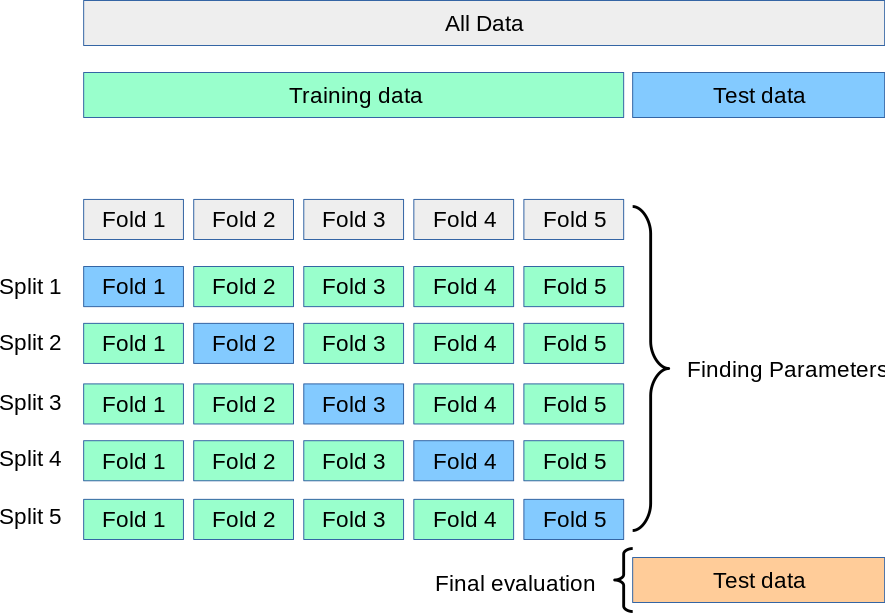

**Fuente**: https://scikit-learn.org/stable/modules/cross_validation.html


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}

# inciiamos un clasificador de vecinos más cercanos
nn_model = KNeighborsClassifier() # no indicamos el total de vecinos

cls = GridSearchCV(nn_model, params) # validación cruzada por k-dobleces
cls.fit(X_train, y_train)

Mejores parámetros

In [ ]:
cls.best_params_

Exactitud del mejor modelo (exactitud promedio sobre los 5 conjuntos de validación):

In [ ]:
cls.best_score_

## Generalización

Aplicamos el mejor modelo sobre el conjunto de prueba y evaluamos la exactitud.

In [ ]:
yp = cls.predict(X_test)

In [ ]:
pd.DataFrame({'y': y_test, 'yp': yp})

Exactitud del 93% (sobre el conjunto de prueba)

In [ ]:
np.mean(yp == y_test)

Evaluada con `sklearn`

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, yp)

# Caso de estudio 1.

En este caso de estudio exploraremos una aplciación de la analítica de negocios en los recursos humanos.

Construiremos un modelo para pronosticar si algún empleado de una empresa abandonará la compañía. Los datos son los siguientes.

In [ ]:
hr = pd.read_csv('hr.csv')
hr.head()

# S      --->    Nivel de satisfacción del empleado
# LPE    --->    Evaluación del último proyecto
# NP     --->    Número de proyectos atendidos en el último año
# ANH    --->    Número de horas trabajadas en n meses previos
# TIC    --->    Tiempo en la compañía (años)
# Newborn -->    ¿El empleado fue madre/padre en el año más reciente?
# left   --->    ¿el empleado abandonó la organización?

En total se dispone de 12 mil observaciones.

In [ ]:
hr.shape

Separamos los datos.

In [ ]:
X = hr[['S',	'LPE',	'NP',	'ANH', 'TIC',	'Newborn']]
y = hr['left']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Preproceso

Al aplicar el método de vecinos más cercanos es necesario estandarizar las variables predictoras para asegurar que todas tengan la misma importancia al construir el modelo.

In [ ]:
pd.DataFrame({'medias': X_train.mean(), 'desviacion': X_train.std()})

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train) # ajustamos el escalador con los datos de entrenamiento

In [ ]:
scaler.mean_

In [ ]:
scaler.scale_

El escalador aplica la transformación:

$$x' = \frac{x-\mu_x}{\sigma_x}$$

In [ ]:
# aplicamos el escalador a ambos conjuntos
Xs_train = scaler.transform(X_train)
Xs_test = scaler.transform(X_test)

In [ ]:
pd.DataFrame({'medias': Xs_train.mean(axis=0), 'desviacion': Xs_train.std(axis=0)}, index=X_train.columns)

In [ ]:
pd.DataFrame({'medias': Xs_test.mean(axis=0), 'desviacion': Xs_test.std(axis=0)}, index=X_train.columns)

## Modelado

Seleccionamos el valor del parámetro `k`.

In [ ]:
params = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}

# inciiamos un clasificador de vecinos más cercanos
nn_model = KNeighborsClassifier() # no indicamos el total de vecinos

cls = GridSearchCV(nn_model, params) # validación cruzada por k-dobleces
cls.fit(Xs_train, y_train)

In [ ]:
cls.best_params_

In [ ]:
cls.best_score_

Elegimos `k=4` como el mejor modelo.

## Evaluación

Evaluamos la calidad predictiva del mejor modelo sobre los datos de prueba.

Pronósticos sobre el conjunto completo.

In [ ]:
yp = cls.predict(Xs_test)

pd.DataFrame({'y': y_test, 'yp': yp}).iloc[:20]

In [ ]:
acc = accuracy_score(y_test, yp)
acc

# Caso de estudio 2

In [ ]:
loan = pd.read_csv('loan-train.csv')
loan.head()

In [ ]:
loan.shape

## Preproceso

In [ ]:
loan.dtypes

In [ ]:
loan['Dependents'].value_counts()

In [ ]:
loan = loan.assign(Dependents=loan['Dependents'].replace({'3+': 3}))
loan['Dependents'] = pd.to_numeric(loan['Dependents'])
loan.dtypes

Separamos predictores y respuesta.

In [ ]:
X = loan[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
y = loan['Loan_Status']

Observa que tenemos valores faltantes.

In [ ]:
loan.isna().sum()

Llenaremos los NA, para eso separamos las variables numéricas de las categóricas.

In [ ]:
X_num = X[['Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]
X_cat = X.drop(['Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History'], axis=1)

In [ ]:
X_num.head()

In [ ]:
X_cat.head()

Los valores faltantes de las columnas numéricas los llenamos con la media de la columna:

In [ ]:
from sklearn.impute import SimpleImputer

X_num_imp = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(X_num)
X_num = pd.DataFrame(X_num_imp, columns=X_num.columns)
X_num.isna().sum()

Los valores faltantes en las variables categóricas se imputan con el más frecuente.

In [ ]:
X_cat_imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit_transform(X_cat)
X_cat = pd.DataFrame(X_cat_imp, columns=X_cat.columns)
X_cat.isna().sum()

Modificamos las variables categóricas.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first').fit(X_cat)
X_cat_one = pd.DataFrame(encoder.transform(X_cat).toarray())
X_cat_one.columns = list('Gender_'+encoder.categories_[0][1:])+list('Married_'+encoder.categories_[1][1:])+list('Education_'+encoder.categories_[2][1:])+list('Self_Employed_'+encoder.categories_[3][1:])+list('Property_'+encoder.categories_[4][1:])
X_cat_one.head(10)

In [ ]:
X_cat['Property_Area'].unique()

In [ ]:
X = pd.concat((X_num, X_cat_one), axis=1)
X

Separamos las variables

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=0)

Reescalamos

In [ ]:
scaler = StandardScaler().fit(X_train)

Xs_train = scaler.transform(X_train)
Xs_test = scaler.transform(X_test)

## Modelado

Seleccionamos el valor del parámetro `k`.

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors': list(range(1,11))}

nn = KNeighborsClassifier()
cls = GridSearchCV(nn, params)
cls.fit(Xs_train, y_train)

In [ ]:
cls.best_params_

In [ ]:
cls.best_score_

## Evaluación

Evaluamos la calidad predictiva del mejor modelo sobre los datos de prueba.

In [ ]:
yp = cls.predict(Xs_test)
pd.DataFrame({'y': y_test, 'yp': yp}).iloc[:10]

In [ ]:
acc = accuracy_score(y_test, yp)
acc

¿Qué tan bueno es el modelo?

In [ ]:
y_test = y_test.apply(lambda y: 1 if y=='Y' else 0)
y_test.mean()

El modelo tiene una capacidad predictiva limitada. Para aumentar el poder predictivo del modelo es necesario disponer de más observaciones.

# Caso de estudio 3

<font color='red'>Actividad</font>


El objetivo de este caso de estudio es el de construir un modelo para determinar si una persona padece diabetes a partir de un conjunto de predictores.

In [3]:
diab = pd.read_csv('C:/Users/rodri/Documents/Python/Proyecto Integrador Big Data/Modelos/data/diabetes-dataset.csv')
diab.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      138             62             35        0  33.6   
1            0       84             82             31      125  38.2   
2            0      145              0              0        0  44.2   
3            0      135             68             42      250  42.3   
4            1      139             62             41      480  40.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.127   47        1  
1                     0.233   23        0  
2                     0.630   31        1  
3                     0.365   24        1  
4                     0.536   21        0

In [4]:
diab.shape

(2000, 9)

No se tienen datos faltantes

In [5]:
diab.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

* Separación de variables

* Reescalamiento

* Modelado

Selecciona el valor óptimo para el parámetro `k`.

* Evalua la calidad predictiva del mejor modelo sobre los datos de prueba.